# PROFILING

We choose K-Means and Agglomerative Hierarchical Clustering for more details.

## Kmeans

In [199]:
df10=df9.copy()

For 2 clusters, we have:

In [200]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters =2 , init = 'k-means++')
# fit model and predict clusters
yhat_kmeans = kmeans.fit_predict(df10)
df10["Clusters"] = yhat_kmeans
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_kmeans

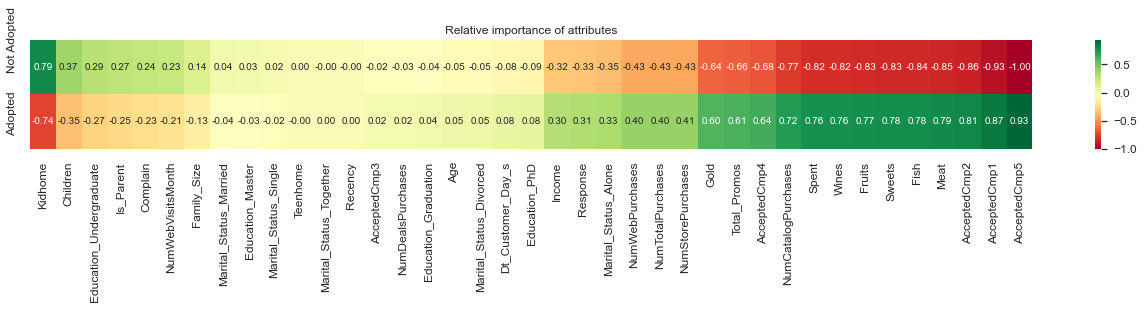

In [201]:
#Relative importance of attributes

cluster_avg = df.groupby(['Clusters']).mean()
df_wo_cluster=df.drop(['Clusters'], axis=1)
population_avg = df_wo_cluster.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)
relative_imp=relative_imp.sort_values(by=1,axis=1)
#heatmap
plt.figure(figsize=(20,2))
plt.title('Relative importance of attributes')
sns.heatmap(data = relative_imp, annot = True, fmt = '.2f', cmap = 'RdYlGn')
labels = ("Not Adopted", "Adopted")
positions = (0, 1.35)
plt.yticks(positions, labels)
plt.ylabel("")
plt.show()

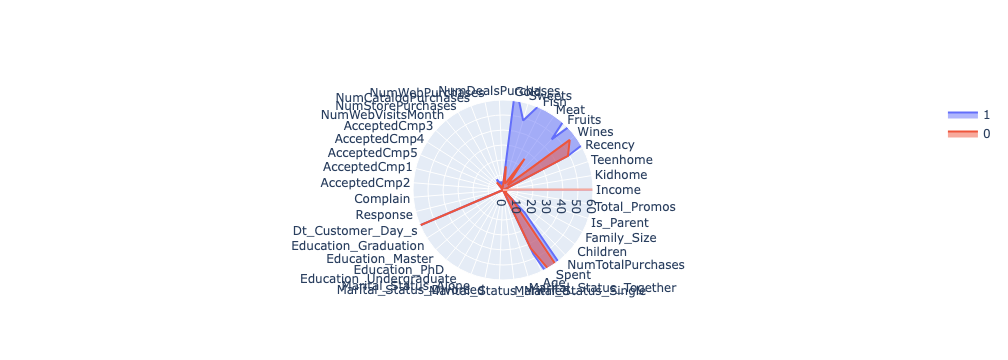

In [193]:
classes=[0,1,2,3]
feature=["Kidhome","Teenhome","Dt_Customer_Day_s", "Children", "Family_Size", "Is_Parent",'Income','Spent']
df_wo=df.drop(['Clusters'], axis=1)
cluster_features = df[df['Clusters'] == 1]
x=[]
y=[]
for i in df_wo.columns:
    r=cluster_features[i].mean()
    y.append(i)
        
categories=y

fig = go.Figure()


for i in df['Clusters'].unique():
    cluster_features = df[df['Clusters'] == i]

    fig.add_trace(go.Scatterpolar(
      r = [cluster_features[cat].mean() for cat in categories],
      theta=categories,
      fill='toself',
      name=classes[i]
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 60]
    )),
  showlegend=True
)

fig.show()

<Figure size 432x288 with 0 Axes>

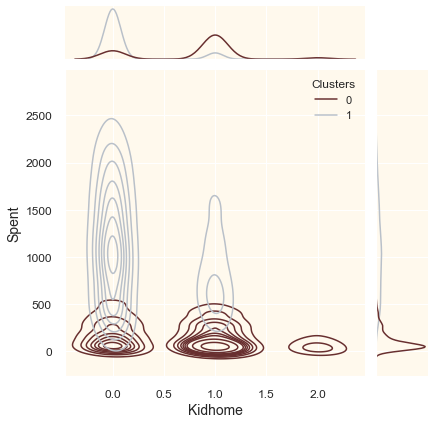

<Figure size 432x288 with 0 Axes>

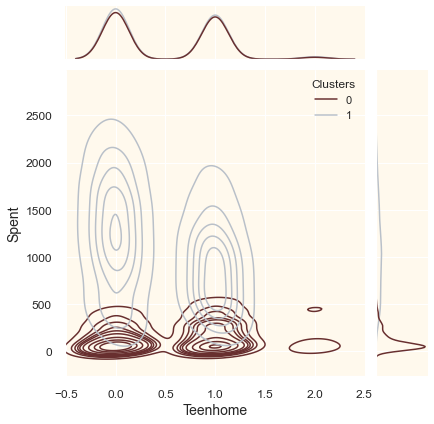

<Figure size 432x288 with 0 Axes>

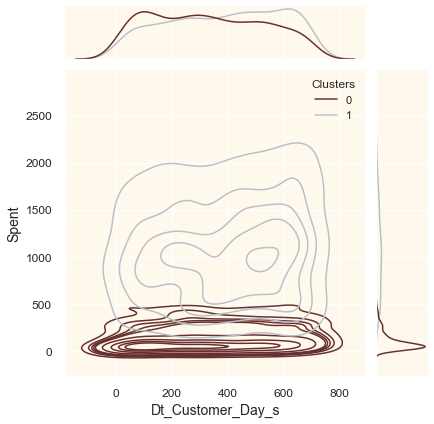

<Figure size 432x288 with 0 Axes>

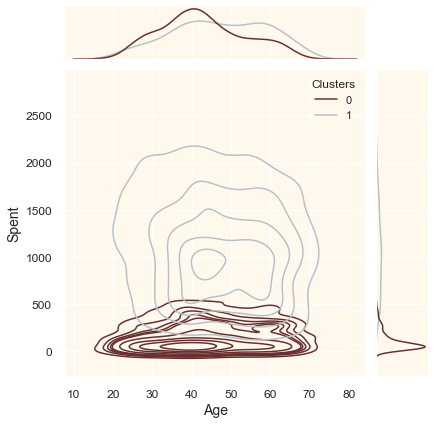

<Figure size 432x288 with 0 Axes>

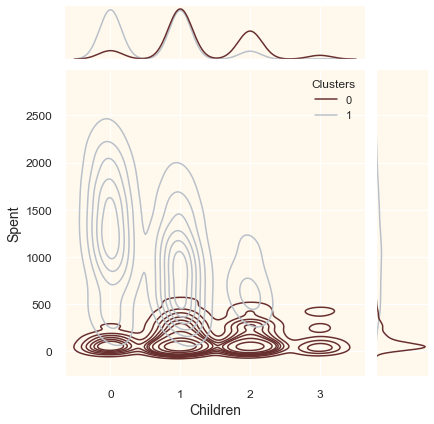

<Figure size 432x288 with 0 Axes>

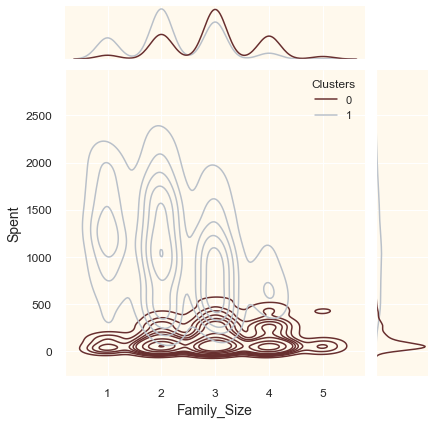

<Figure size 432x288 with 0 Axes>

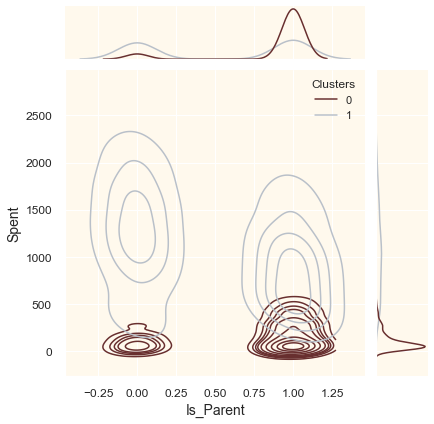

In [172]:
Personal = [ "Kidhome","Teenhome","Dt_Customer_Day_s", "Age", "Children", "Family_Size", "Is_Parent"]
pal = ["#682F2F","#B9C0C9"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

## Agglomerative Clustering

In [202]:
df10=df9.copy()

For k=4 clusters, we have:

In [203]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(df10)
df10["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

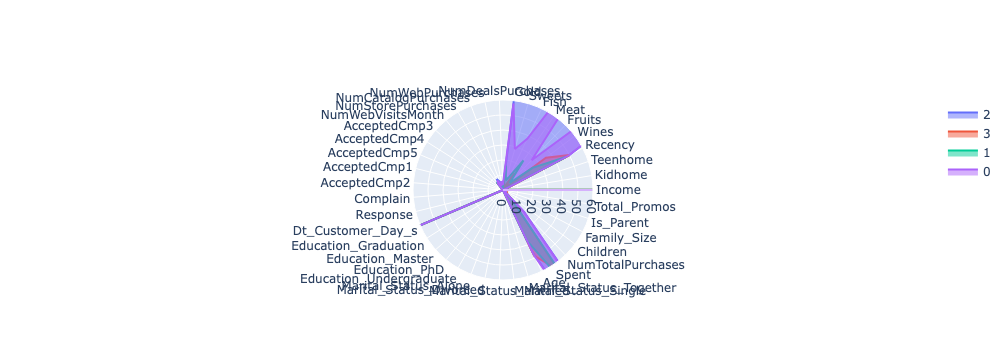

In [196]:
classes=[0,1,2,3]
feature=["Kidhome","Teenhome","Dt_Customer_Day_s", "Children", "Family_Size", "Is_Parent",'Income','Spent']
df_wo=df.drop(['Clusters'], axis=1)
cluster_features = df[df['Clusters'] == 1]
x=[]
y=[]
for i in df_wo.columns:
    r=cluster_features[i].mean()
    y.append(i)
        
categories=y

fig = go.Figure()


for i in df['Clusters'].unique():
    cluster_features = df[df['Clusters'] == i]

    fig.add_trace(go.Scatterpolar(
      r = [cluster_features[cat].mean() for cat in categories],
      theta=categories,
      fill='toself',
      name=classes[i]
  ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 60]
    )),
  showlegend=True
)

fig.show()

<Figure size 432x288 with 0 Axes>

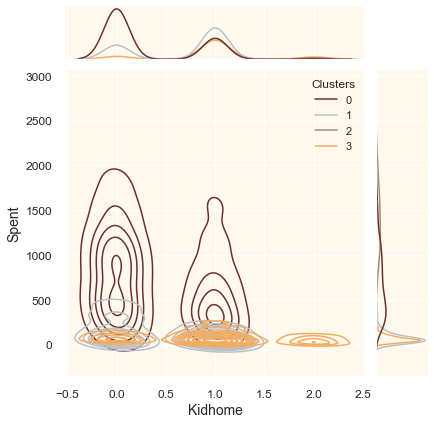

<Figure size 432x288 with 0 Axes>

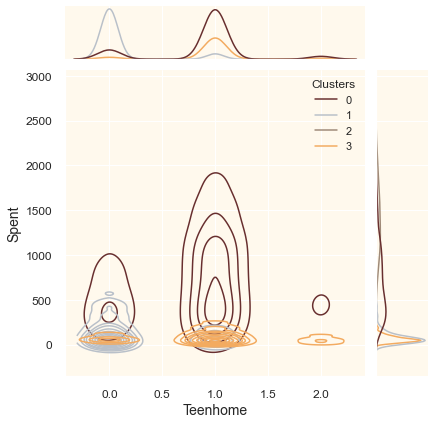

<Figure size 432x288 with 0 Axes>

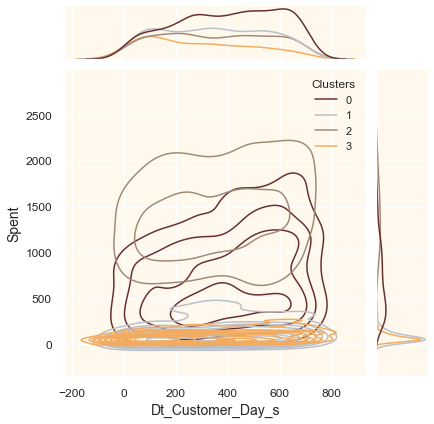

<Figure size 432x288 with 0 Axes>

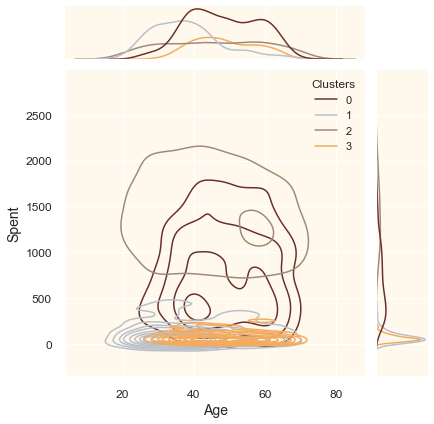

<Figure size 432x288 with 0 Axes>

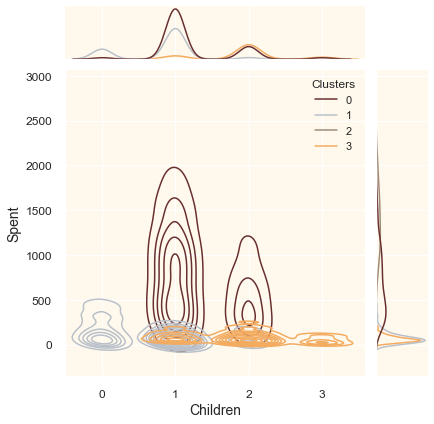

<Figure size 432x288 with 0 Axes>

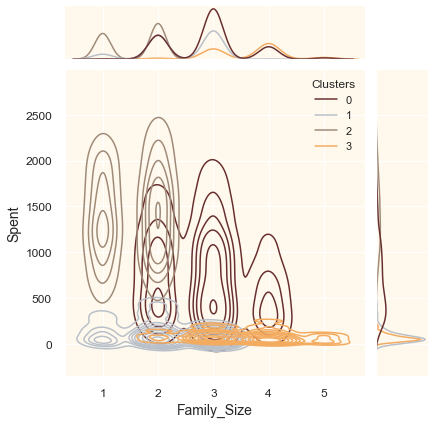

<Figure size 432x288 with 0 Axes>

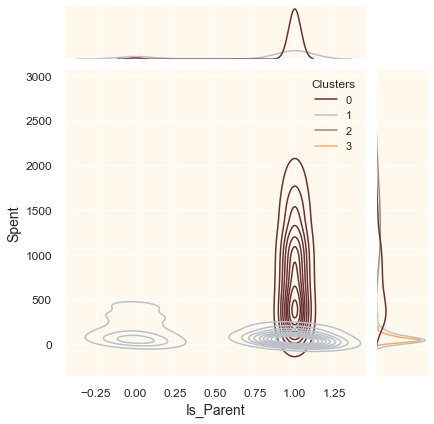

In [175]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
Personal = [ "Kidhome","Teenhome","Dt_Customer_Day_s", "Age", "Children", "Family_Size", "Is_Parent"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

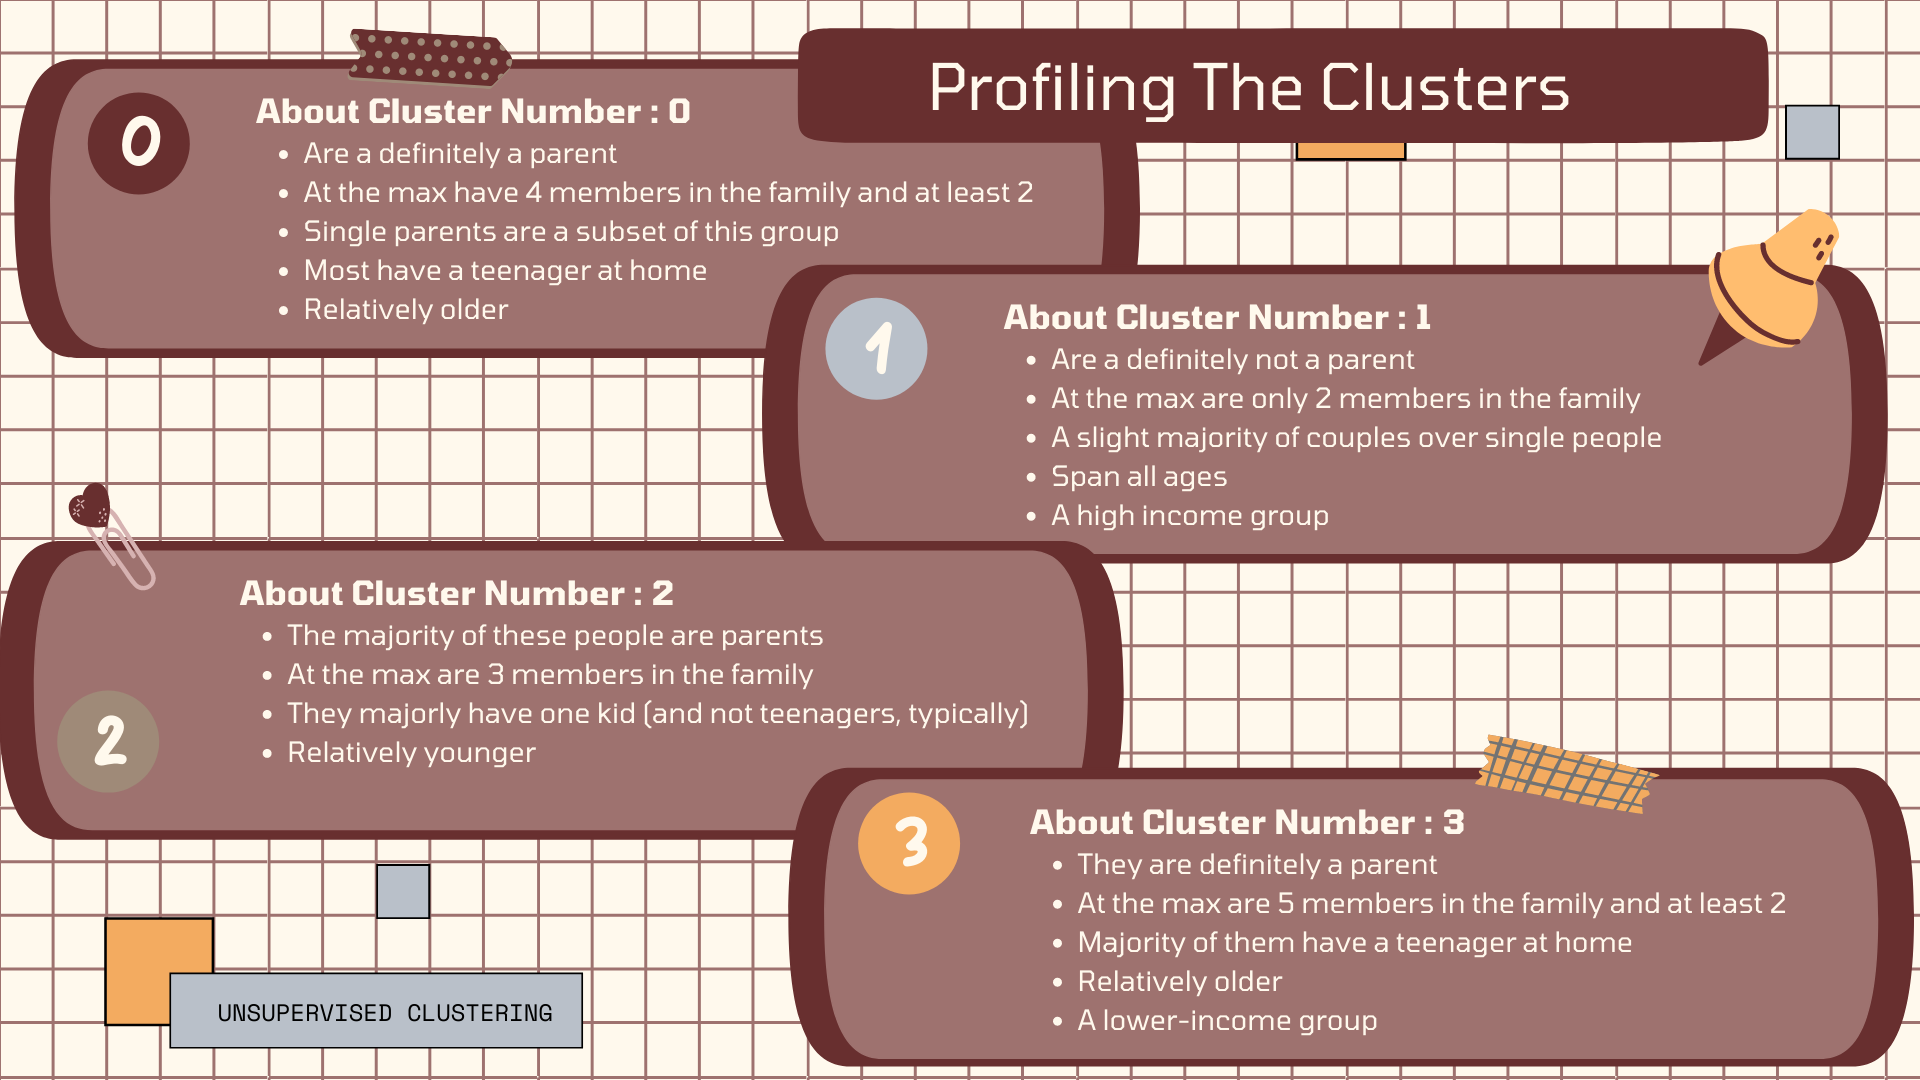